In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Yelp_Restaurant_Reviews.csv')

In [2]:
#Replacing the ratings with positive and negative values (1-3-negative) • (4-5 postive)
sentiment = []
for i in range(len(df['Rating'])):
    if df['Rating'].iloc[i] < 3:
        sentiment.append("negative")
    elif df['Rating'].iloc[i] == 3:
        sentiment.append("neutral")
    else:
        sentiment.append("positive")
df['Sentiment'] = sentiment

In [3]:
df.head()

,Company name,Location,Rating,Review Text,Sentiment
0,sidney dairy barn,sidney,5,All I can say is they have very good ice cream...,positive
1,sidney dairy barn,sidney,4,Nice little local place for ice cream.My favor...,positive
2,sidney dairy barn,sidney,5,A delicious treat on a hot day! Staff was very...,positive
3,sidney dairy barn,sidney,4,This was great service and a fun crew! I got t...,positive
4,sidney dairy barn,sidney,5,This is one of my favorite places to get ice c...,positive


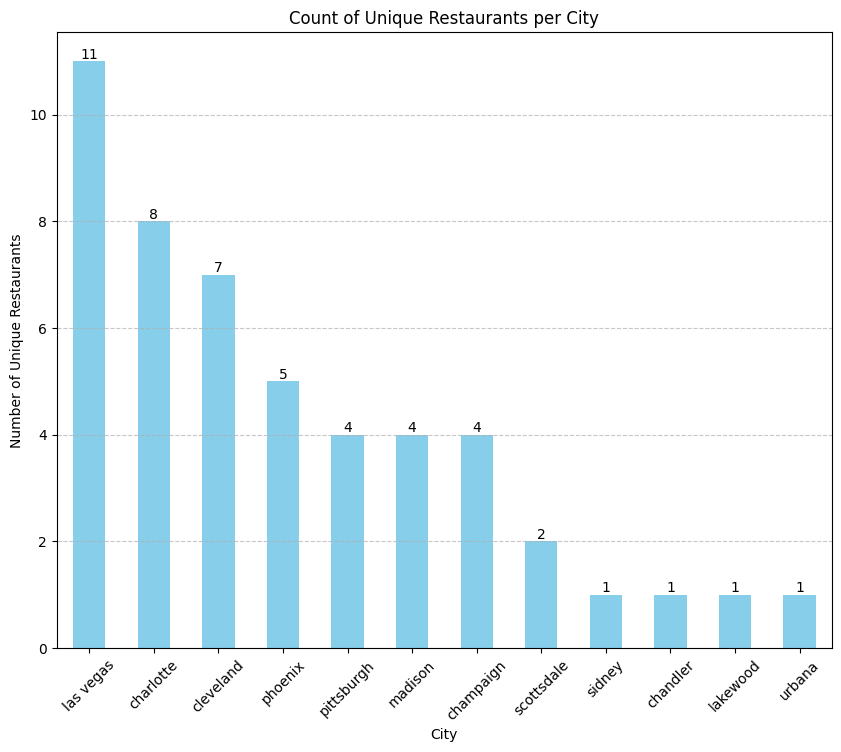

In [4]:
import matplotlib.pyplot as plt

# printing the count of restaurants in each city.
# Remove duplicates based on 'Company name' and 'Location'
unique_restaurants = df.drop_duplicates(subset=['Company name', 'Location'])

# Count the number of unique restaurants in each city
city_counts = unique_restaurants['Location'].value_counts()

plt.figure(figsize=(10, 8))
ax = city_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Unique Restaurants per City')
plt.xlabel('City')
plt.ylabel('Number of Unique Restaurants')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.70)

# Add numbers to the y-axis
for i in ax.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height(), str(int(i.get_height())), ha='center', va='bottom')

plt.show()


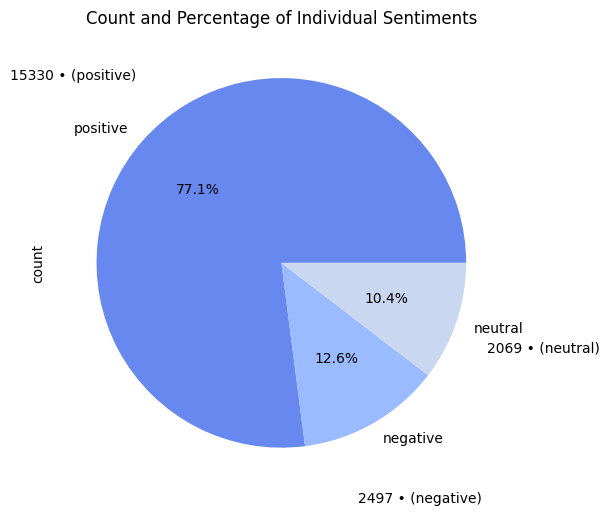

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of positive, negative, and neutral reviews
reviewcount = df['Sentiment'].value_counts()

plt.figure(figsize=(10,6))
pie = reviewcount.plot(kind='pie', colors=sns.color_palette("coolwarm"), autopct="%1.1f%%")

# Add numbers and percentages to each pie slice
for i, (count, label) in enumerate(zip(reviewcount.values, reviewcount.index)):
    angle = (pie.patches[i].theta2 - pie.patches[i].theta1) / 2. + pie.patches[i].theta1
    x = 1.5 * np.cos(np.pi * angle / 180)
    y = 1.5 * np.sin(np.pi * angle / 180)
    plt.text(x, y, f'{count} • ({label})', ha='center', fontsize=10)

plt.title("Count and Percentage of Individual Sentiments")
plt.show()

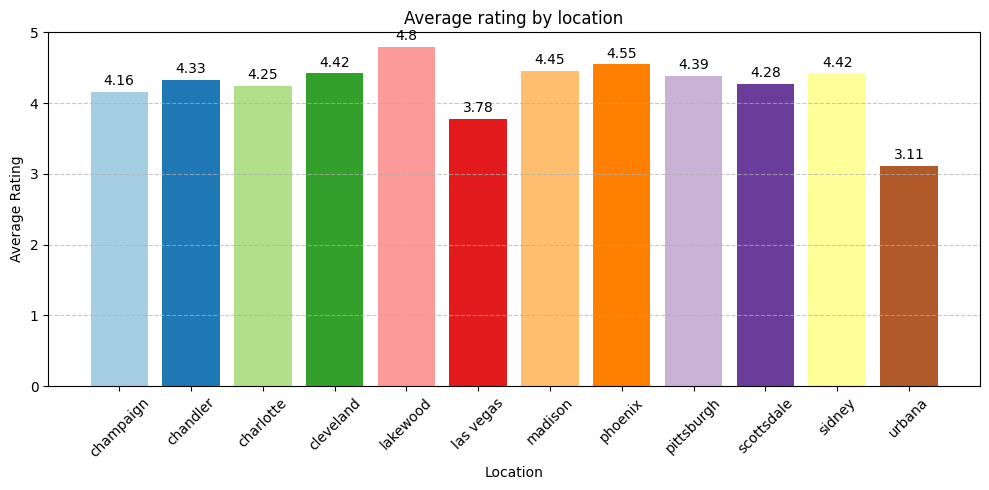

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('Yelp_Restaurant_Reviews.csv')

# Group the data by location and calculate the average rating for each
average_ratings = df.groupby('Location')['Rating'].mean()

# Sort the locations by name if needed
average_ratings = average_ratings.sort_index()

# Create a bar plot
plt.figure(figsize=(10, 5))
bars = plt.bar(average_ratings.index, average_ratings.values, color=plt.cm.Paired(range(len(average_ratings))))

# Adding the average ratings on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.title('Average rating by location')
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Adjust y-axis range to include text
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
